In [2]:
require(data.table)
require(tidyverse)

### load results 

In [3]:
res.transcript_level <- readRDS('../dat/1908/res.distal.peaks.fisher.oneVother.celltype_2.Rds')

In [4]:
res.transcript_level <- res.transcript_level%>%as.data.frame(stringsAsFactors=F)
res.transcript_level$pval <- as.numeric(res.transcript_level$pval)
res.transcript_level$odds <- as.numeric(res.transcript_level$odds)

In [5]:
unique(res.transcript_level$celltype)

[[1]]
[1] "alpha"

[[2]]
[1] "beta"

[[3]]
[1] "delta"

[[4]]
[1] "gamma"

### Heatmap of features 

In [6]:
dat.mat <- fread('../dat/1908/all.distal.long.matrix.csv')
dim(dat.mat)
head(dat.mat)

[1] 45314787        3

distal_peak,barcode,cluster
1_10216_10512,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2
1_237657_237858,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2
1_967851_968930,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2
1_967851_968930,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2
1_1004053_1005548,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2
1_1004053_1005548,Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,beta_2


In [7]:
range(res.transcript_level$type_frac)
range(res.transcript_level$other_frac)

[1] 0.0000000 0.8736402

[1] 0.000000 0.853557

In [8]:
head(res.transcript_level %>% mutate(celltype = as.character(celltype)) %>% group_by(celltype) %>% 
    mutate(padj = p.adjust(pval, method = "bonferroni")) %>% arrange(pval) %>% filter(celltype == 
    "beta"), 5)

distal_peak,pval,odds,type_frac,other_frac,celltype,padj
3_14493614_14494983,0.000000e+00,10.20231560,0.2407252,0.03013156,beta,0.000000e+00
2_162998298_162999907,7.348306e-274,0.03238122,0.005578801,0.1476871,beta,1.616833e-268
13_28491300_28492612,6.614741e-246,7.71868027,0.2061367,0.03253643,beta,1.455428e-240
14_100937753_100938908,7.289170e-234,12.08337904,0.1603905,0.0155609,beta,1.603821e-228
4_85339175_85339987,1.528236e-230,8.11713641,0.1880056,0.02772669,beta,3.362546e-225


In [9]:
res.transcript_level %>% mutate(celltype = as.character(celltype)) %>% group_by(celltype) %>% 
    summarise(npeak = n())

celltype,npeak
alpha,220028
beta,220028
delta,220028
gamma,220028


In [10]:
npeaks <- res.transcript_level%>%pull(distal_peak)%>%unique()%>%length()
npeaks

[1] 220028

In [104]:
res.transcript_level <- res.transcript_level%>%ungroup() %>% mutate(celltype = as.character(celltype)) %>% 
    group_by(celltype) %>% mutate(padj = p.adjust(pval, method = "bonferroni",n = npeaks)) %>% 
    arrange(pval)

In [112]:
head(p.adjust(res.transcript_level %>% filter(celltype == "gamma") %>% arrange(pval) %>% 
    pull(pval), method = "bonferroni"),2)

[1] 1.767273e-24 1.273770e-19

In [105]:
res.transcript_level %>% filter(celltype == "gamma") %>% mutate(padj = p.adjust(pval)) %>% 
    top_n(-2)

Selecting by padj


distal_peak,pval,odds,type_frac,other_frac,celltype,padj
2_66297778_66298701,8.032038e-30,30.85685,0.1407767,0.005273284,gamma,1.767273e-24
7_1892863_1894150,5.789125e-25,19.29987,0.1407767,0.008408751,gamma,1.273764e-19


In [106]:
res.transcript_level%>%group_by(celltype)%>%top_n(-2)

Selecting by padj


distal_peak,pval,odds,type_frac,other_frac,celltype,padj
2_162998298_162999907,0.000000e+00,33.87448016,0.1835896,0.006593407,alpha,0.000000e+00
3_14493614_14494983,0.000000e+00,10.20231560,0.2407252,0.03013156,beta,0.000000e+00
3_14493614_14494983,2.960185e-315,0.05937519,0.0159099,0.2139965,alpha,6.513235e-310
2_162998298_162999907,7.348306e-274,0.03238122,0.005578801,0.1476871,beta,1.616833e-268
3_187385366_187386284,5.768337e-73,112.01819631,0.09052925,0.0008875083,delta,1.269196e-67
3_187341258_187342085,7.969325e-54,27.44601548,0.08913649,0.003550033,delta,1.753475e-48
2_66297778_66298701,8.032038e-30,30.85685281,0.1407767,0.005273284,gamma,1.767273e-24
7_1892863_1894150,5.789125e-25,19.29986744,0.1407767,0.008408751,gamma,1.273770e-19


In [113]:
table(res.transcript_level %>% mutate(isFeature = padj < 1e-10) %>% select(celltype, 
    isFeature))
table(res.transcript_level %>% mutate(isFeature = padj < 0.05) %>% select(celltype, 
    isFeature))
table(res.transcript_level %>% mutate(isFeature = padj < 0.1) %>% select(celltype, 
    isFeature))
table(res.transcript_level %>% mutate(isFeature = pval < 0.01) %>% select(celltype, 
    isFeature))

        isFeature
celltype  FALSE   TRUE
   alpha 210466   9562
   beta  210783   9245
   delta 219812    216
   gamma 220018     10

        isFeature
celltype  FALSE   TRUE
   alpha 192098  27930
   beta  192709  27319
   delta 218400   1628
   gamma 219802    226

        isFeature
celltype  FALSE   TRUE
   alpha 190601  29427
   beta  191196  28832
   delta 218218   1810
   gamma 219773    255

        isFeature
celltype  FALSE   TRUE
   alpha 133495  86533
   beta  134095  85933
   delta 201663  18365
   gamma 213641   6387

[1] 1000 2000 2743 3374


alpha  beta delta gamma 
 5593  7169   718   206 

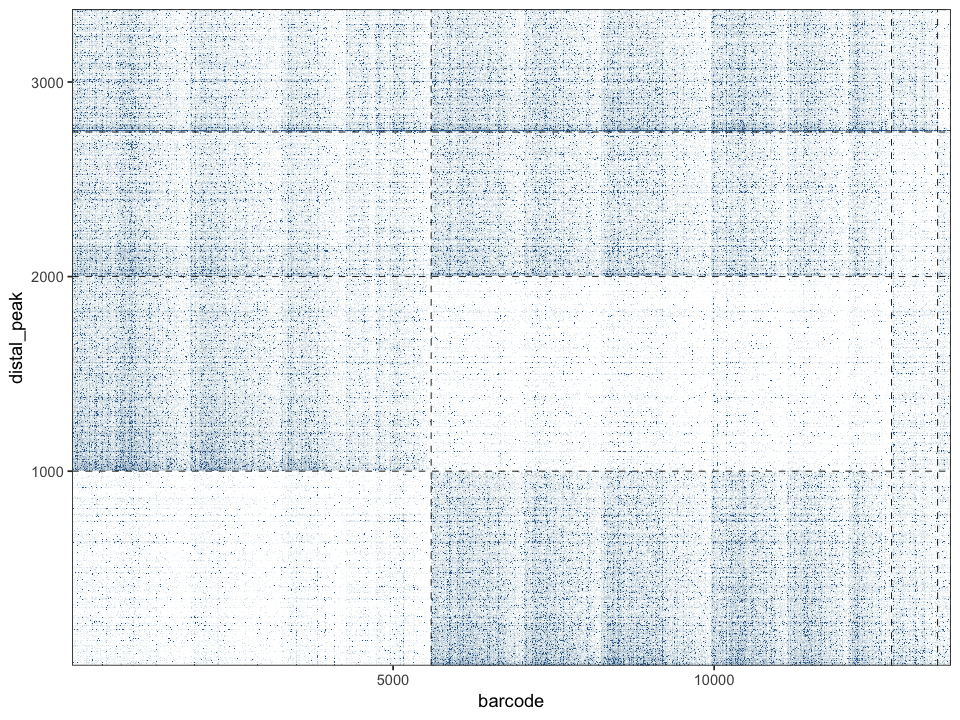

In [117]:
options(repr.plot.width = 8, repr.plot.height = 6)

n = 1000
sep.peaks <- c()
df_peaks <- head(res.transcript_level %>% filter(celltype == "alpha", odds < 1) %>% 
    arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)
sep.peaks <- c(sep.peaks,length(df_peaks))
df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "beta", 
    odds < 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
    unique()
sep.peaks <- c(sep.peaks,length(df_peaks))
df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "delta", 
    odds < 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
    unique()
sep.peaks <- c(sep.peaks,length(df_peaks))
df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "gamma", 
    odds < 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
    unique()
(sep.peaks <- c(sep.peaks,length(df_peaks)))


pd.hm.2 <- dat.mat %>% filter(distal_peak %in% df_peaks) %>% unique() %>% arrange(cluster)
pd.hm.2 <- pd.hm.2 %>% mutate(distal_peak = as.numeric(factor(distal_peak, levels = as.character(df_peaks))), 
    cluster = sub("(_1)|(_2)", "", cluster)) %>% filter(cluster %in% c("alpha", "beta", 
    "delta", "gamma"))
pd.hm.2 <- pd.hm.2 %>% mutate(barcode = as.numeric(factor(barcode, levels = unique(pd.hm.2$barcode))))
(seps <- table(pd.hm.2 %>% select(-distal_peak) %>% unique() %>% pull(cluster)))
ggplot(pd.hm.2 %>% mutate(N = 1), aes(y = distal_peak, x = barcode)) %+% geom_tile(aes(fill = N, 
    group = cluster)) + geom_hline(yintercept = sep.peaks, linetype = 2, 
    size = 0.25) + geom_vline(xintercept = as.numeric(cumsum(seps)), linetype = 2, 
    size = 0.25) + coord_cartesian(expand = F) + theme_bw() + theme(legend.position = "none", 
    panel.grid = element_blank())

In [11]:
n = 1000
df_peaks <- lapply(c("alpha", "beta", "delta", "gamma"), function(ct) head(res.transcript_level %>% 
    filter(celltype == ct, odds > 1) %>% arrange(pval), n) %>% arrange(pval) %>% 
    pull(distal_peak) %>% unique())
names(df_peaks)<- c("alpha", "beta", "delta", "gamma")

fun.runHomer <- function(ct = "alpha") {
    p <- df_peaks[[ct]]
    target_bed <- paste0(ct, ".bed")
    head(data.frame(peak = unlist(p)) %>% separate(peak, into = c("chr", "start", 
        "end"), sep = "_") %>% mutate(chr = paste0("chr", chr)), 1)
    x <- data.frame(peak = unlist(p)) %>% separate(peak, into = c("chr", "start", 
        "end"), sep = "_") %>% mutate(chr = paste0("chr", chr))
    write.table(x, file = target_bed, row.names = FALSE, col.names = FALSE, sep = "\t", 
        quote = FALSE)
    genome = "hg19"
    num.cores = 10
    scan.size = 200
    fdr.num = 5
    result.dir <- paste0("./", ct)
    optimize.count = 2
    (cmd <- paste("findMotifsGenome.pl", target_bed, genome, result.dir, "-fdr", 
        fdr.num, "-S", optimize.count, "-p", num.cores))
    system(cmd)
    fread(paste0(result.dir, "/knownResults.txt"))
}
res.homer <- lapply(c("beta", "delta", "gamma"),fun.runHomer)
names(res.homer)<- c("beta", "delta", "gamma")

In [34]:
n = 1000
df_peaks <- lapply(c("alpha", "beta", "delta", "gamma"), function(ct) head(res.transcript_level %>% 
    filter(celltype == ct, odds < 1) %>% arrange(pval), n) %>% arrange(pval) %>% 
    pull(distal_peak) %>% unique())
names(df_peaks)<- paste0(c("alpha", "beta", "delta", "gamma"),'_rev')

res.homer <- lapply(names(df_peaks),fun.runHomer)
names(res.homer)<- names(df_peaks)

In [32]:
lapply(names(res.homer), function(x) head(res.homer[[x]] %>% select(`Motif Name`, 
    `Log P-value`), 2))

Motif Name,Log P-value
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,-294.3
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,-282.9
Motif Name,Log P-value
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,-308.6
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,-308.0
Motif Name,Log P-value
Pdx1(Homeobox)/Islet-Pdx1-ChIP-Seq(SRA008281)/Homer,-91.81
Hoxb4(Homeobox)/ES-Hoxb4-ChIP-Seq(GSE34014)/Homer,-84.60


In [46]:
fun.plotDistalPeaks <- function(n = 1000,type='tile') {

    sep.peaks <- c()
    
    df_peaks <- head(res.transcript_level %>% filter(celltype == "alpha", odds > 
        1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)
    (sep.peaks <- c(sep.peaks, length(df_peaks)))
    df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "beta", 
        odds > 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
        unique()
    (sep.peaks <- c(sep.peaks, length(df_peaks)))
    df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "delta", 
        odds > 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
        unique()
    (sep.peaks <- c(sep.peaks, length(df_peaks)))
    df_peaks <- df_peaks %>% c(head(res.transcript_level %>% filter(celltype == "gamma", 
        odds > 1) %>% arrange(pval), n) %>% arrange(pval) %>% pull(distal_peak)) %>% 
        unique()
    (sep.peaks <- c(sep.peaks, length(df_peaks)))
    pd.hm.2 <- dat.mat %>% filter(distal_peak %in% df_peaks) %>% unique() %>% arrange(cluster)
    pd.hm.2 <- pd.hm.2 %>% mutate(distal_peak = as.numeric(factor(distal_peak, levels = as.character(df_peaks))), 
        cluster = sub("(_1)|(_2)", "", cluster)) %>% filter(cluster %in% c("alpha", 
        "beta", "delta", "gamma"))
    pd.hm.2 <- pd.hm.2 %>% mutate(barcode = as.numeric(factor(barcode, levels = unique(pd.hm.2$barcode))))
    (seps <- table(pd.hm.2 %>% select(-distal_peak) %>% unique() %>% pull(cluster)))
    if(type=='tile')
        ggplot(pd.hm.2 %>% mutate(N = 1), aes(y = distal_peak, x = barcode)) + geom_tile(aes(fill = N, 
            group = cluster)) + geom_hline(yintercept = sep.peaks, linetype = 2, size = 0.25) + 
            geom_vline(xintercept = as.numeric(cumsum(seps)), linetype = 2, size = 0.25) + 
            coord_cartesian(expand = F) + theme_bw() + theme(legend.position = "none", 
            panel.grid = element_blank())
    else
        ggplot(pd.hm.2 %>% mutate(N = 1), aes(y = distal_peak, x = barcode)) + geom_raster(aes(fill = N, 
        group = cluster)) + geom_hline(yintercept = sep.peaks, linetype = 2, size = 0.25) + 
        geom_vline(xintercept = as.numeric(cumsum(seps)), linetype = 2, size = 0.25) + 
        coord_cartesian(expand = F) + theme_bw() + theme(legend.position = "none", 
        panel.grid = element_blank())
}

In [44]:
options(repr.plot.width = 8, repr.plot.height = 6)
top1k.res <- fun.plotDistalPeaks()

In [45]:
head(top1k.res)

distal_peak,barcode,cluster
638,1,alpha
1213,1,alpha
1510,1,alpha
813,1,alpha
270,1,alpha
1106,1,alpha


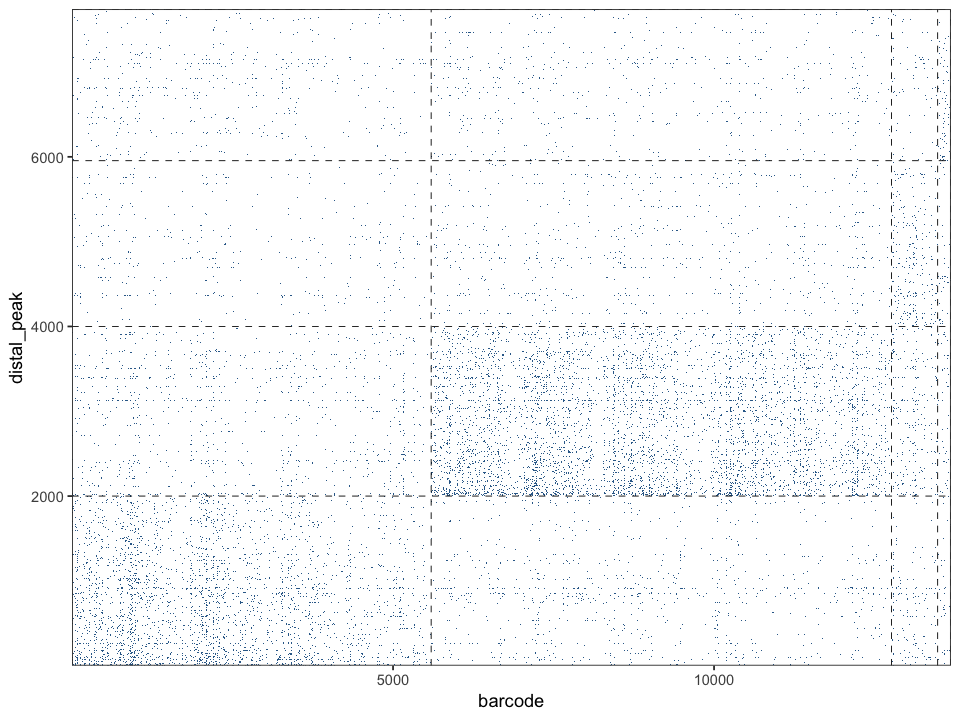

In [40]:
fun.plotDistalPeaks(n=2000)

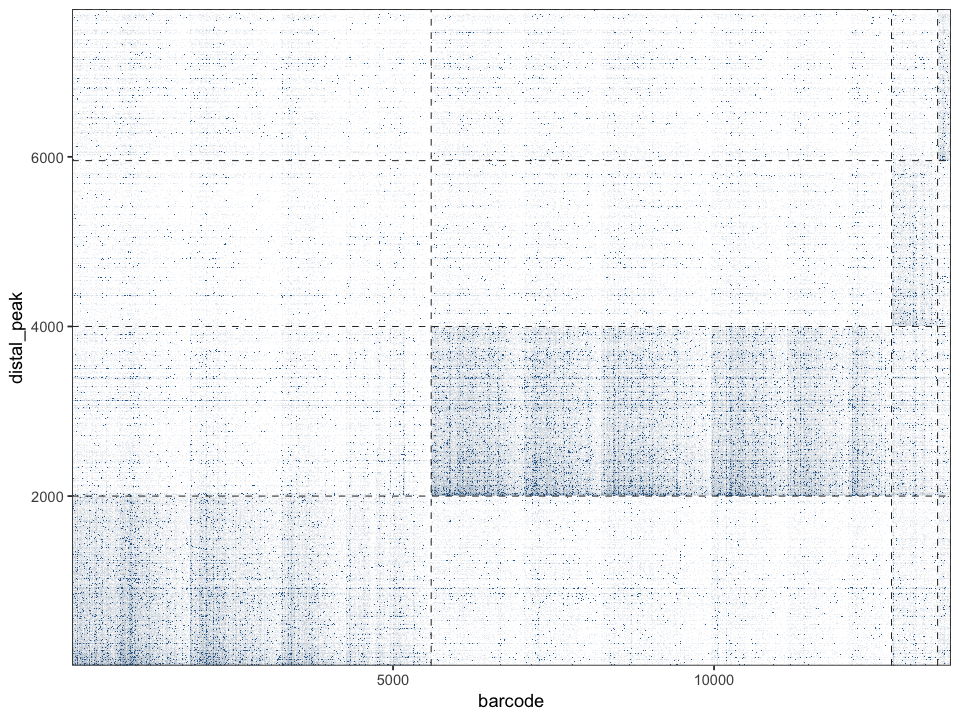

In [38]:
fun.plotDistalPeaks(n=2000)

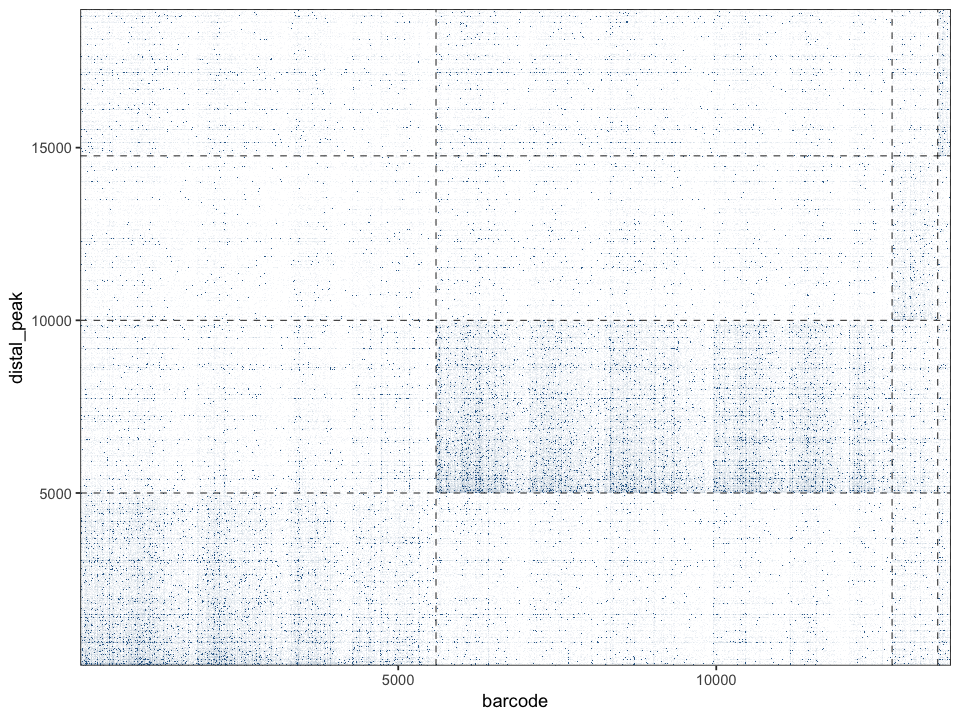

In [121]:
fun.plotDistalPeaks(n=5000)

### Try to re-organize based on fraction of openning

In [67]:
head(pd.hm.2 %>%mutate(ntotal=as.numeric(seps[cluster]))%>%
     group_by(distal_peak, cluster,ntotal) %>% summarise(N=n(),open_frac = n()/unique(ntotal)),4)

distal_peak,cluster,ntotal,N,open_frac
1,alpha,5593,1027,0.183622385
1,beta,7170,40,0.005578801
1,delta,718,4,0.005571031
1,gamma,206,1,0.004854369


In [69]:
pd.hm.2<- pd.hm.2 %>%mutate(ntotal=as.numeric(seps[cluster]))%>%
     group_by(distal_peak, cluster,ntotal) %>% summarise(N=n(),open_frac = n()/unique(ntotal))

In [91]:
pd.hm.3 <- pd.hm.2 %>% select(distal_peak, cluster, open_frac) %>% spread(value = open_frac, 
    key = cluster, fill = 0) %>%as.data.frame()%>% column_to_rownames("distal_peak")
head(pd.hm.3)

alpha,beta,delta,gamma
0.1836224,0.005578801,0.005571031,0.004854369
0.1330234,0.005439331,0.006963788,0.004854369
0.1534060,0.012970711,0.011142061,0.029126214
0.1110316,0.002092050,0.006963788,0.019417476
0.1296263,0.007810321,0.002785515,0.019417476
0.1623458,0.015620642,0.068245125,0.106796117


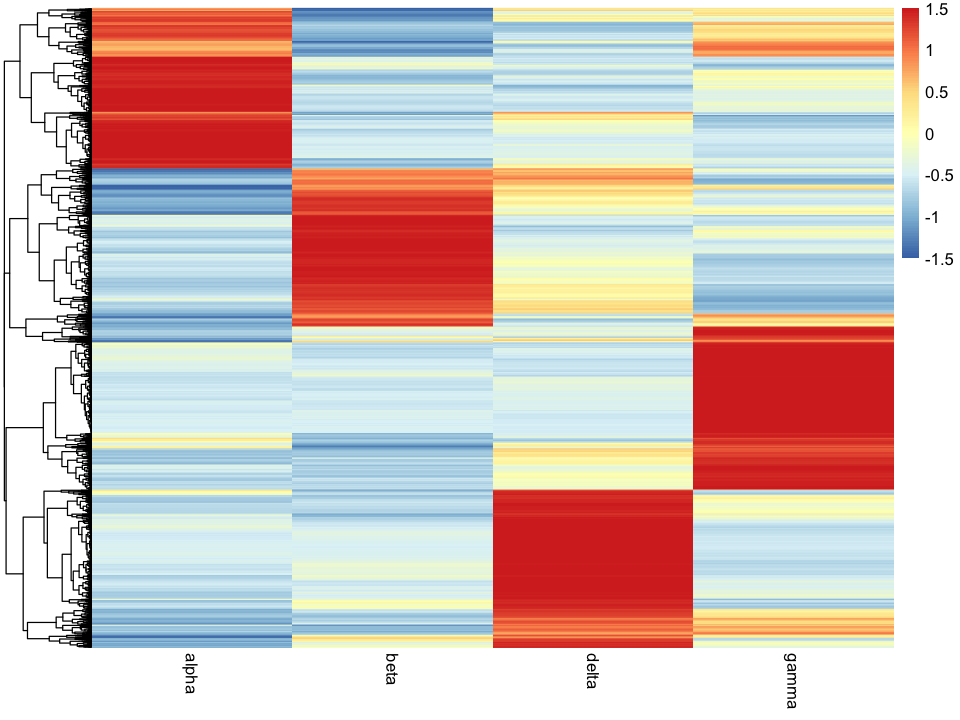

In [96]:
require(pheatmap)
pheatmap(pd.hm.3,scale='row',cluster_cols = F,show_rownames = F)

### Motif for each cell types 